In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X, columns=['co1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)

(100, 6)


In [4]:
df.head()

,co1,col2,col3,col4,col5,target
0,-0.331839,1.875169,1.899205,-1.134036,1.194559,0
1,-0.834312,-1.266419,1.704120,-0.390228,-0.353848,1
2,-0.564235,3.438890,2.124894,-0.973855,-1.303961,0
3,-0.259909,2.057937,2.187319,0.236946,1.553024,0
4,-1.426105,-0.970161,1.465728,-0.580759,-0.268789,1


In [5]:
# Function for row sampling
def sample_rows(df, percent):
    return df.sample(int(percent * df.shape[0]), replace=True)

In [6]:
# Function feature sampling
import random
def sample_features(df,percent):
    cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [7]:
# Function for combined sampling
def combined_sampling(df, row_percent, col_percent):
    new_df = sample_rows(df, row_percent)
    return sample_features(new_df, col_percent)

In [12]:
df1 = combined_sampling(df,0.5, 0.5)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23268\1720126728.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [13]:
df2 = combined_sampling(df,0.5, 0.5)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23268\1720126728.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [14]:
df3 = combined_sampling(df,0.5, 0.5)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23268\1720126728.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [22]:
df1.head()

,co1,col2,target
91,-0.548423,-2.742870,1
70,-0.276038,1.468191,0
20,-0.338653,-1.400641,1
97,-0.417343,1.478829,0
72,1.814461,1.093698,0


In [17]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [18]:
clf1.fit(df1.iloc[:,0:2], df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2], df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2], df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5, 0.875, 'X[1] <= -0.544\ngini = 0.493\nsamples = 50\nvalue = [22, 28]'),
 Text(0.25, 0.625, 'X[0] <= 2.727\ngini = 0.074\nsamples = 26\nvalue = [1, 25]'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(0.375, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.625, 'X[1] <= 0.367\ngini = 0.219\nsamples = 24\nvalue = [21, 3]'),
 Text(0.625, 0.375, 'X[0] <= 0.934\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]')]

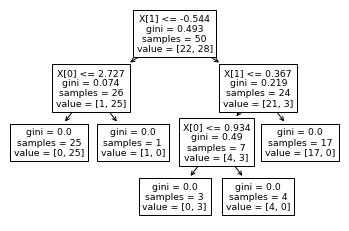

In [19]:
from sklearn.tree import plot_tree
plot_tree(clf1)

[Text(0.4642857142857143, 0.9166666666666666, 'X[0] <= -0.073\ngini = 0.48\nsamples = 50\nvalue = [30, 20]'),
 Text(0.2857142857142857, 0.75, 'X[1] <= 1.816\ngini = 0.298\nsamples = 22\nvalue = [4, 18]'),
 Text(0.14285714285714285, 0.5833333333333334, 'X[0] <= -0.386\ngini = 0.111\nsamples = 17\nvalue = [1, 16]'),
 Text(0.07142857142857142, 0.4166666666666667, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.21428571428571427, 0.4166666666666667, 'X[0] <= -0.335\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.14285714285714285, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2857142857142857, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.42857142857142855, 0.5833333333333334, 'X[1] <= 1.991\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.35714285714285715, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5, 0.4166666666666667, 'X[1] <= 2.107\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.42857142857142855, 0.25, 'gini =

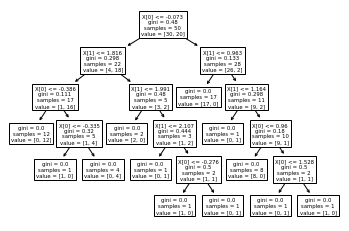

In [20]:
plot_tree(clf2)

[Text(0.6333333333333333, 0.9285714285714286, 'X[0] <= 0.332\ngini = 0.487\nsamples = 50\nvalue = [21, 29]'),
 Text(0.4, 0.7857142857142857, 'X[1] <= 1.09\ngini = 0.32\nsamples = 35\nvalue = [7, 28]'),
 Text(0.26666666666666666, 0.6428571428571429, 'X[1] <= -2.384\ngini = 0.264\nsamples = 32\nvalue = [5, 27]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.5, 'X[0] <= -0.007\ngini = 0.225\nsamples = 31\nvalue = [4, 27]'),
 Text(0.2, 0.35714285714285715, 'X[1] <= -0.932\ngini = 0.137\nsamples = 27\nvalue = [2, 25]'),
 Text(0.13333333333333333, 0.21428571428571427, 'X[1] <= -1.129\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.06666666666666667, 0.07142857142857142, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.2, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.26666666666666666, 0.21428571428571427, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.4666666666666667, 0.35714285714285715, 'X[0] <= 0.227\n

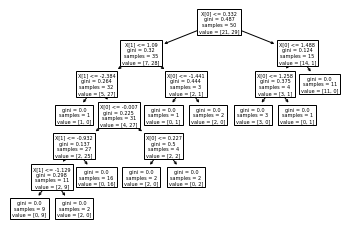

In [21]:
plot_tree(clf3)

In [25]:
clf1.predict(np.array([-0.548423, -2.742870]).reshape(1,2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [26]:
clf2.predict(np.array([-0.548423, -2.742870]).reshape(1,2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [27]:
clf3.predict(np.array([-0.548423, -2.742870]).reshape(1,2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])